In [1]:
from task3.utils.data_utils import load_zipped_pickle
from task3.utils.img_utils import np_to_opencv, get_segment_crop, mask_to_ratio, get_box_props, resize_img
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np

In [2]:
train = load_zipped_pickle('data/train.pkl')

### Examine pixels

In [3]:
for i, sample in enumerate(train):
    video = sample['video']
    flat_video = video.flatten()
    print('{}: min: {}, max: {}, avg: {}, median: {}'.format(i, flat_video.min(), flat_video.max(), np. average(flat_video), np.median(flat_video)))
    # df_describe = pd.DataFrame(flat_video)
    # df_describe.describe()

0: min: 0, max: 255, avg: 41.95953468281445, median: 13.0
1: min: 0, max: 255, avg: 39.5252619351312, median: 1.0
2: min: 0, max: 255, avg: 44.309482117200325, median: 14.0
3: min: 0, max: 255, avg: 33.609542455250256, median: 1.0
4: min: 0, max: 255, avg: 38.91929384642613, median: 3.0
5: min: 0, max: 255, avg: 36.703331207483, median: 1.0
6: min: 0, max: 255, avg: 42.54865407701542, median: 7.0
7: min: 0, max: 255, avg: 47.582502193435175, median: 7.0
8: min: 0, max: 255, avg: 37.22287649169837, median: 3.0
9: min: 0, max: 255, avg: 43.8208709991991, median: 4.0
10: min: 0, max: 255, avg: 40.501022867169254, median: 2.0
11: min: 0, max: 255, avg: 30.73789404154519, median: 1.0
12: min: 0, max: 255, avg: 26.282618741352472, median: 3.0
13: min: 0, max: 255, avg: 29.084816237541528, median: 0.0
14: min: 0, max: 255, avg: 26.88424857975105, median: 1.0
15: min: 0, max: 255, avg: 34.62075258124577, median: 2.0
16: min: 0, max: 255, avg: 46.271929074717235, median: 7.0
17: min: 0, max: 25

### Visualize a frame

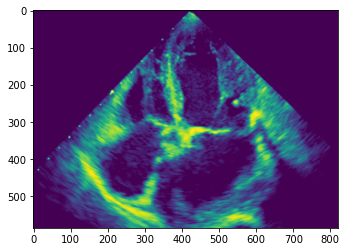

In [4]:
sample = train[50]
video = sample['video']
frame = video[:,:,60]
plt.imshow(frame, interpolation=None)

### Visualize a label

labels: [0, 6, 31]


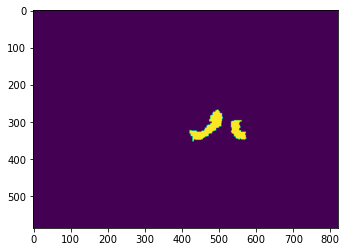

In [11]:
print('labels:', sample['frames'])
first_label = sample['frames'][0]
plt.imshow(sample['label'][:, :, first_label], interpolation=None)

### Show box mask

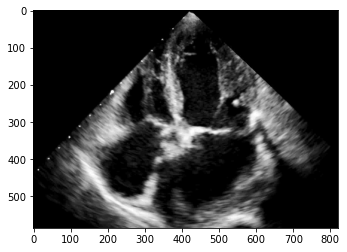

In [6]:
frame_cv = np_to_opencv(frame)
plt.imshow(frame_cv, interpolation=None)

### Show box mask

(586, 821)


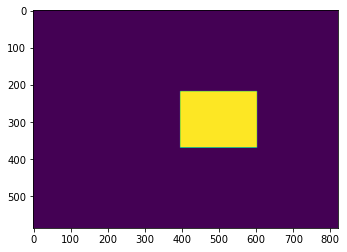

In [7]:
mask = sample['box']
print(mask.shape)
plt.imshow(mask, interpolation=None)

### Adjust box to aspect ratio

(155, 207)
old_mask {'top_left': (218, 396), 'bottom_right': (370, 603), 'box_dims': (152, 207), 'h_to_w_ratio': 0.7342995169082126, 'center': (294, 500), 'mask_dims': (586, 821)}
new_mask {'top_left': (216, 396), 'bottom_right': (371, 603), 'box_dims': (155, 207), 'h_to_w_ratio': 0.748792270531401, 'center': (294, 500), 'mask_dims': (586, 821)}


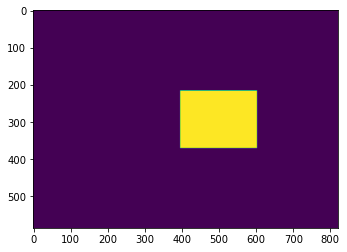

In [8]:
new_mask = mask_to_ratio(mask)

print('old_mask', get_box_props(mask))
print('new_mask', get_box_props(new_mask))
#res_box = mask_to_ratio(box)
plt.imshow(new_mask, interpolation=None)

### Crop image to box

(155, 207)


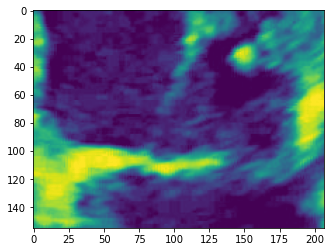

In [9]:
cropped = get_segment_crop(frame, mask=new_mask)
print(cropped.shape)
plt.imshow(cropped, interpolation=None)

### Resize cropped frame

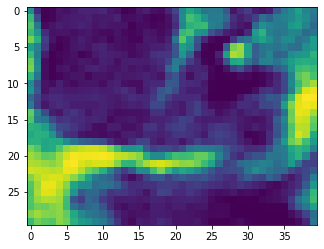

In [10]:
resized = resize_img(cropped, width=40, height=30)
plt.imshow(resized, interpolation=None)